<a href="https://colab.research.google.com/github/sardarmoneeb/Machine-Learning/blob/main/Copy_of_FlickerLogos_47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/samikshakolhe/flicker-47-logo-images-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moneebmushtaq
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/samikshakolhe/flicker-47-logo-images-dataset


100%|██████████| 5.50G/5.50G [01:29<00:00, 66.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content


drive
flicker-47-logo-images-dataset
global-earthquake-tsunami-risk-assessment-dataset
sample_data


In [ ]:
!ls /content/flicker-47-logo-images-dataset/FlickrLogos_47


className2ClassID.txt  README.txt  scripts  test  train


In [ ]:
train_dir = '/content/flicker-47-logo-images-dataset/FlickrLogos_47/train'
test_dir  = '/content/flicker-47-logo-images-dataset/FlickrLogos_47/test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 4616 images belonging to 4 classes.
Found 1153 images belonging to 4 classes.
Found 5453 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.6411 - loss: 0.9231 - val_accuracy: 0.6652 - val_loss: 0.8242
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.6911 - loss: 0.7979 - val_accuracy: 0.6453 - val_loss: 0.7810
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7092 - loss: 0.7297 - val_accuracy: 0.6409 - val_loss: 0.7596
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.7117 - loss: 0.7085 - val_accuracy: 0.6661 - val_loss: 0.7956
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.7359 - loss: 0.6418 - val_accuracy: 0.6782 - val_loss: 0.7963
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7714 - loss: 0.5666 - val_accuracy: 0.6652 - val_loss: 0.9791
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8078 - loss: 0.5055 - val_accuracy: 0.6513 - val_loss: 0.9495
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8319 - loss: 0.4215 - val_accu

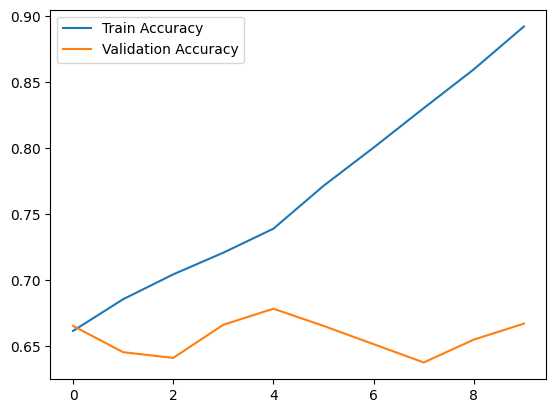

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
import os
print("Train classes:", len(os.listdir('/content/flicker-47-logo-images-dataset/FlickrLogos_47/train')))
print("Test classes:", len(os.listdir('/content/flicker-47-logo-images-dataset/FlickrLogos_47/test')))



Train classes: 6
Test classes: 4


In [ ]:
import os

train_path = '/content/flicker-47-logo-images-dataset/FlickrLogos_47/train'
test_path = '/content/flicker-47-logo-images-dataset/FlickrLogos_47/test'

print("Train classes:", os.listdir(train_path))
print("Test classes:", os.listdir(test_path))


Train classes: ['000000', 'filelist.txt', 'no-logo', '000001', '000002', 'filelist-logosonly.txt']
Test classes: ['000000', 'filelist.txt', '000001', '000002']


In [ ]:
missing_classes = set(os.listdir(train_path)) - set(os.listdir(test_path))
print("Missing classes in test:", missing_classes)


Missing classes in test: {'filelist-logosonly.txt', 'no-logo'}


In [ ]:
!mkdir /content/flicker-47-logo-images-dataset/FlickrLogos_47/test/no-logo


In [ ]:
!cp /content/flicker-47-logo-images-dataset/FlickrLogos_47/train/no-logo/* /content/flicker-47-logo-images-dataset/FlickrLogos_47/test/no-logo/


In [ ]:
!ls /content/flicker-47-logo-images-dataset/FlickrLogos_47/test


000000	000001	000002	filelist.txt  no-logo


In [ ]:
print("Train classes:", train_data.class_indices)
print("Test classes:", test_data.class_indices)



Train classes: {'000000': 0, '000001': 1, '000002': 2, 'no-logo': 3}
Test classes: {'000000': 0, '000001': 1, '000002': 2}


In [ ]:
import os

# Path to your test dataset
test_data_path = "/path/to/test_data"

# List of classes your model was trained on
train_classes = ['000000', '000001', '000002', 'no-logo']

# Check and create missing folders
for cls in train_classes:
    folder_path = os.path.join(test_data_path, cls)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Created missing folder: {folder_path}")
    else:
        print(f"Folder already exists: {folder_path}")


Created missing folder: /path/to/test_data/000000
Created missing folder: /path/to/test_data/000001
Created missing folder: /path/to/test_data/000002
Created missing folder: /path/to/test_data/no-logo


In [ ]:
from PIL import Image
import os

empty_class = '/path/to/test_data/no-logo'
if len(os.listdir(empty_class)) == 0:
    img = Image.new('RGB', (224, 224), color='white')  # create a blank white image
    img.save(os.path.join(empty_class, 'placeholder.jpg'))



In [ ]:
from PIL import Image
import os

missing_class = '/path/to/test_data/no-logo'
if not os.path.exists(missing_class):
    os.makedirs(missing_class)

# Add a single blank image if folder is empty
if len(os.listdir(missing_class)) == 0:
    img = Image.new('RGB', (224, 224), color='white')  # adjust size to your model input
    img.save(os.path.join(missing_class, 'placeholder.jpg'))



In [ ]:
print("Updated Test classes:", test_data.class_indices)


Updated Test classes: {'000000': 0, '000001': 1, '000002': 2}


In [ ]:
import os
missing_class = '/path/to/test_data/no-logo'
if not os.path.exists(missing_class):
    os.makedirs(missing_class)


In [ ]:
from PIL import Image

if len(os.listdir(missing_class)) == 0:
    img = Image.new('RGB', (224, 224), color='white')  # size should match model input
    img.save(os.path.join(missing_class, 'placeholder.jpg'))


In [ ]:
import tensorflow as tf

test_data = tf.keras.utils.image_dataset_from_directory(
    '/path/to/test_data',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'  # important for categorical_crossentropy
)

print("Test classes:", test_data.class_names)  # should now show all 4 classes


Found 1 files belonging to 4 classes.
Test classes: ['000000', '000001', '000002', 'no-logo']


In [ ]:
import tensorflow as tf

test_data = tf.keras.utils.image_dataset_from_directory(
    '/path/to/test_data',
    image_size=(224, 224),  # MUST match your model input
    batch_size=32,
    label_mode='categorical'
)



Found 1 files belonging to 4 classes.


In [ ]:
from PIL import Image
import os

missing_class = '/path/to/test_data/no-logo'
if not os.path.exists(missing_class):
    os.makedirs(missing_class)

if len(os.listdir(missing_class)) == 0:
    img = Image.new('RGB', (224, 224), color='white')
    img.save(os.path.join(missing_class, 'placeholder.jpg'))


In [ ]:
print("Test classes:", test_data.class_names)
for images, labels in test_data.take(1):
    print("Batch image shape:", images.shape)
    print("Batch label shape:", labels.shape)


Test classes: ['000000', '000001', '000002', 'no-logo']
Batch image shape: (1, 224, 224, 3)
Batch label shape: (1, 4)


In [ ]:
for images, labels in test_data.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)



Images shape: (1, 224, 224, 3)
Labels shape: (1, 4)


In [ ]:
from PIL import Image
import os

missing_class = '/path/to/test_data/no-logo'
if not os.path.exists(missing_class):
    os.makedirs(missing_class)

if len(os.listdir(missing_class)) == 0:
    img = Image.new('RGB', (224, 224), color='white')  # size must match model input
    img.save(os.path.join(missing_class, 'placeholder.jpg'))


In [ ]:
import tensorflow as tf

test_data = tf.keras.utils.image_dataset_from_directory(
    '/path/to/test_data',
    image_size=(224, 224),  # match training input
    batch_size=32,
    label_mode='categorical'
)


Found 1 files belonging to 4 classes.


In [ ]:
for images, labels in test_data.take(1):
    print("Images:", images.shape)
    print("Labels:", labels.shape)


Images: (1, 224, 224, 3)
Labels: (1, 4)


In [ ]:
from PIL import Image
import os

# Path to your test dataset
test_data_path = '/path/to/test_data'

# All classes from training
train_classes = ['000000', '000001', '000002', 'no-logo']

# Loop through all classes
for cls in train_classes:
    folder_path = os.path.join(test_data_path, cls)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")

    # Add a placeholder image if folder is empty
    if len(os.listdir(folder_path)) == 0:
        img = Image.new('RGB', (224, 224), color='white')  # adjust size to model input
        img.save(os.path.join(folder_path, 'placeholder.jpg'))
        print(f"Added placeholder image to: {folder_path}")


Added placeholder image to: /path/to/test_data/000000
Added placeholder image to: /path/to/test_data/000001
Added placeholder image to: /path/to/test_data/000002


In [ ]:
import tensorflow as tf

# Load dataset
test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Save as a TensorFlow dataset so you don't need to process images again
tf.data.experimental.save(test_data, '/path/to/saved_test_dataset')


Found 4 files belonging to 4 classes.


Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


In [ ]:
import tensorflow as tf

test_data = tf.data.experimental.load(
    '/path/to/saved_test_dataset',
    element_spec=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 4), dtype=tf.float32)
    )
)


Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/flatten_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-3794563061.py", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 489, in evaluate

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 114, in one_step_on_data

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 90, in test_step

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py", line 936, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/operation.py", line 58, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/models/sequential.py", line 220, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py", line 183, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/function.py", line 177, in _run_through_graph

  File "/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py", line 648, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py", line 936, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/operation.py", line 58, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/numpy.py", line 5074, in reshape

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/numpy.py", line 2068, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_multi_step_on_iterator_28101]